### 6.1 Optimal Classification

#### 6.1.1 Discriminant Functions and Decision Boundaries

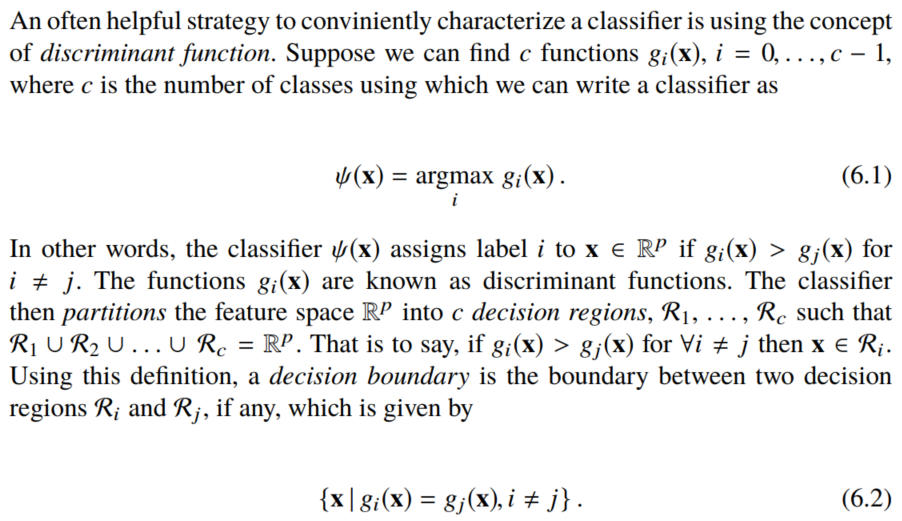

#### 6.1.2 Bayes Classifier

We refer to the classifier defined in (6.6) (or its equivalent forms) as the optimal classifier, aka Bayes classifier

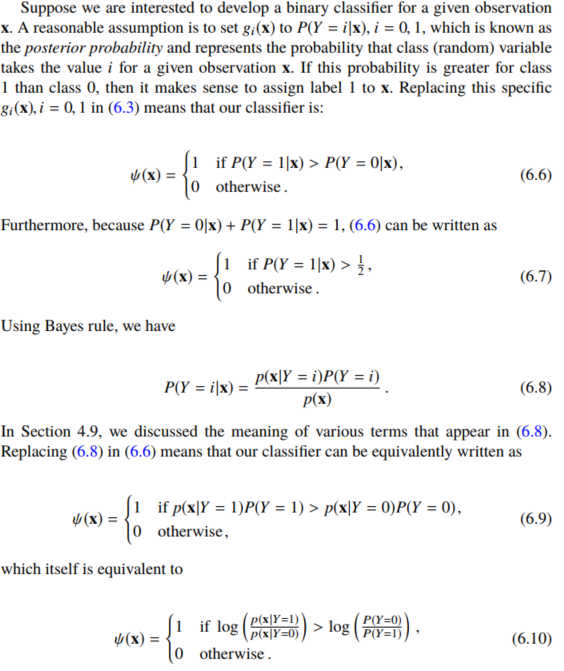

Bayes classifier for multiclass clasification with c classes:

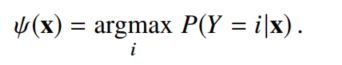

### 6.2 Linear Models for Classification

Models for which the decision boundaries are linear functions of the feature vector $x$
- e.g. linear discriminant analysis, logistic regression, perceptron, linear support vector machines

#### 6.2.1 Linear Discriminant Analysis

##### Bayes Rule for Normal Populations with a Common Covariance Matrix

**Assumption 1:** class-conditional probability densities are Gaussian:

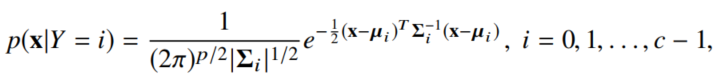

**Assumption 2:** $\Sigma = \Sigma_i, \forall i$, i.e. there is a common covariance matrix $\Sigma$ across all classes

For a binary classification problem:

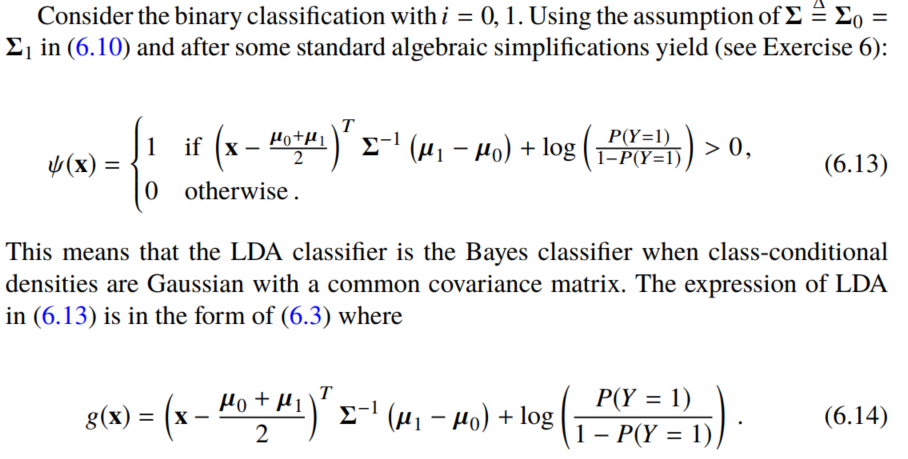
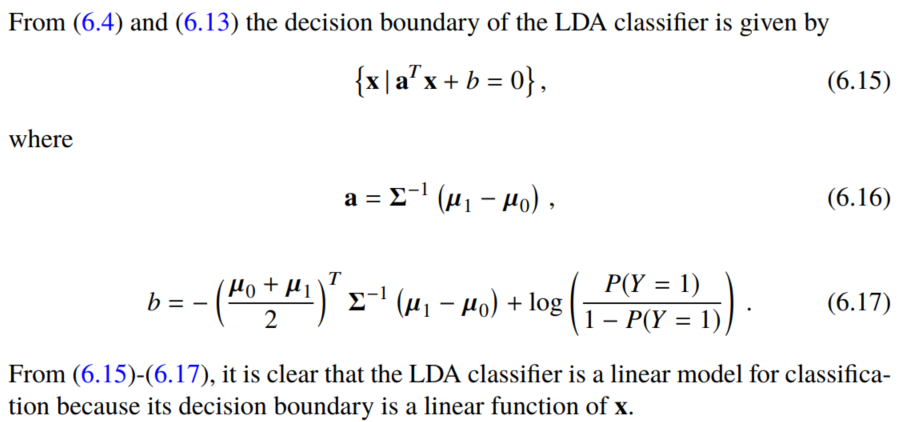

##### Some Properties of LDA

1. The vector $a$ is normal to the hyperplane
2. Actual distributional parameters $\mu_0, \mu_1, \Sigma$ are unknown, unless we work with synthetically generated data for which we have the underlying parameters that we used to generate the data in the first place 

##### Sample LDA Classifier

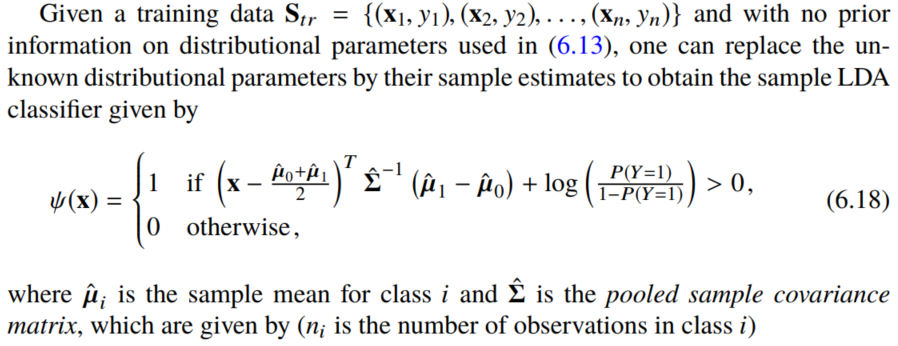
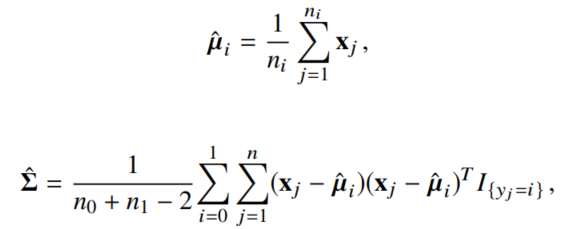
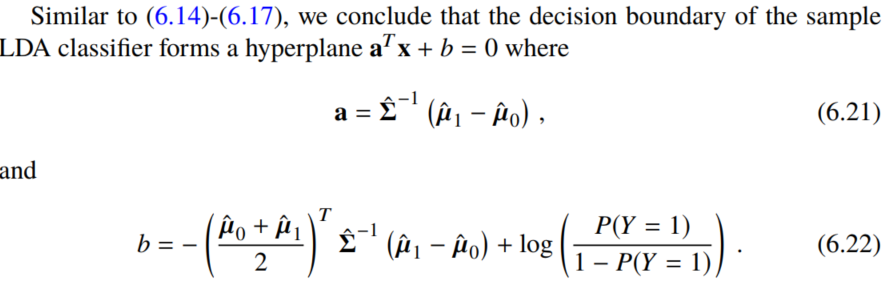

##### Extension to Multiclass Classification 

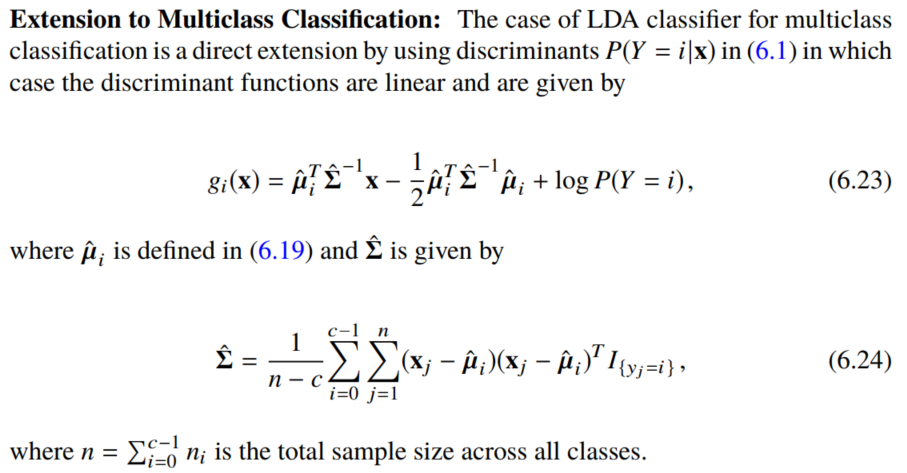

#### 6.2.2 Logistic Regression

##### Definition

- Assume some monotonic transformation (logit function) of posterior $P(Y=i|x)$  is linear
- If $p \in (0,1)$, then $\text{logit}(p) = \log{(\frac{p}{1-p})}$
- The ratio inside the log function is known as *odds*

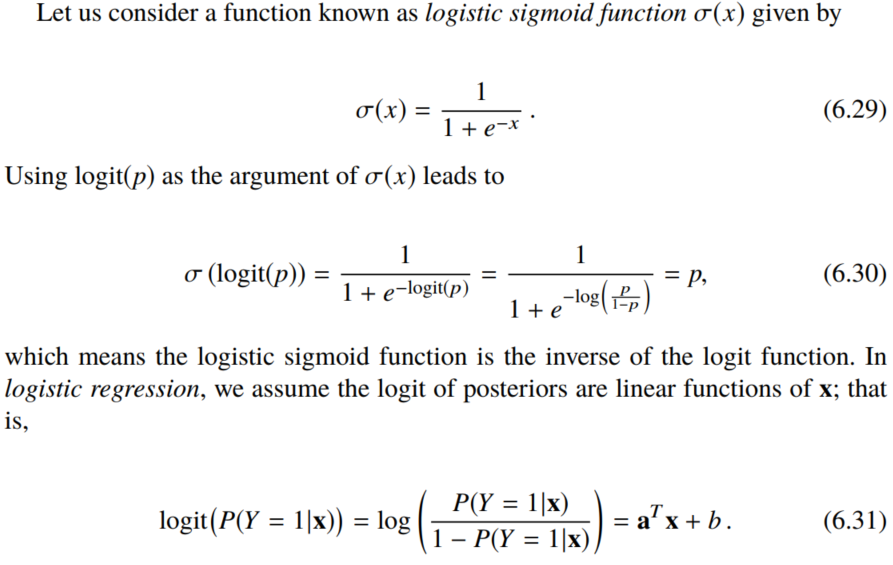
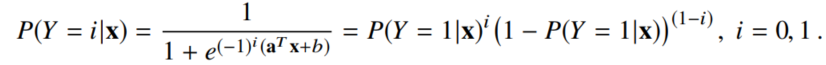
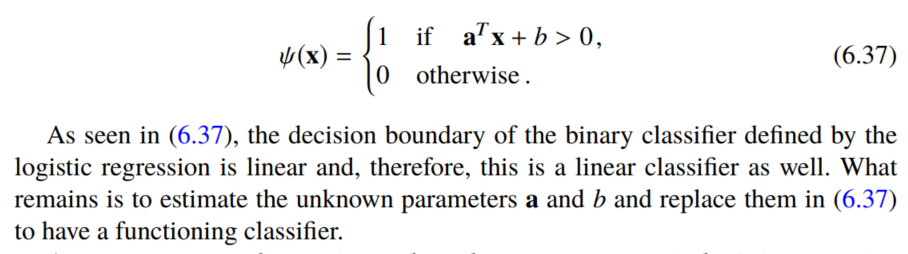
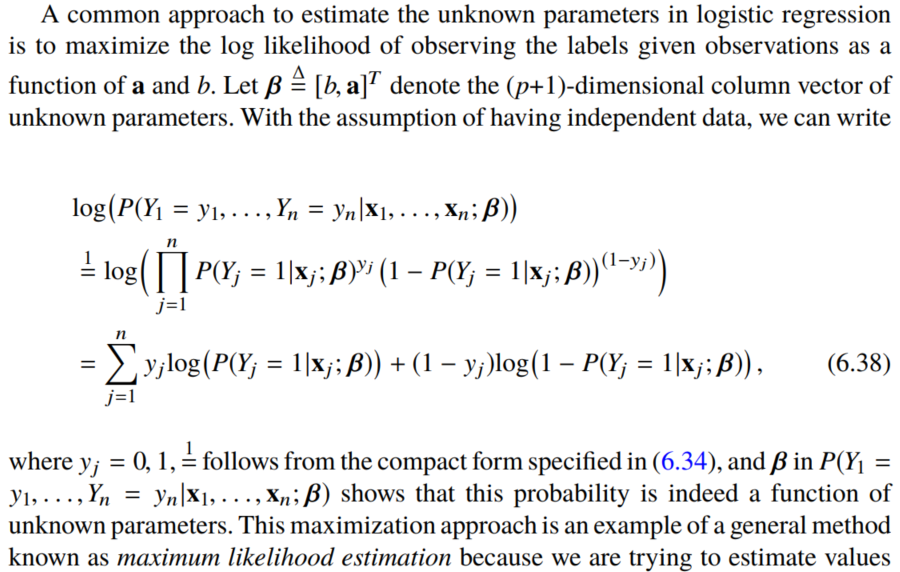
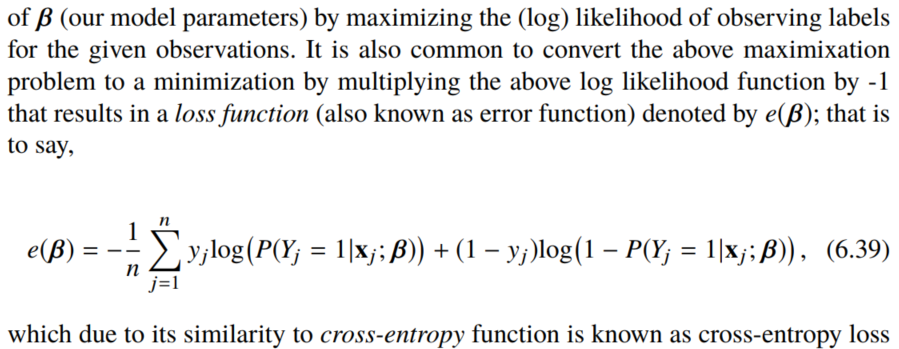
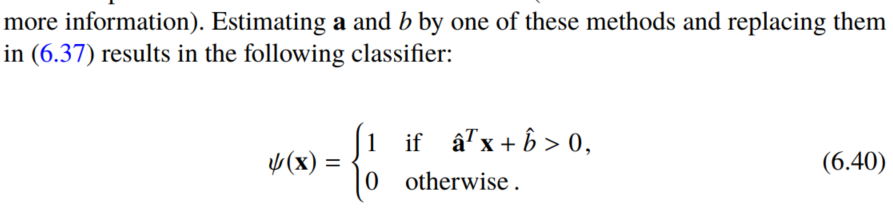
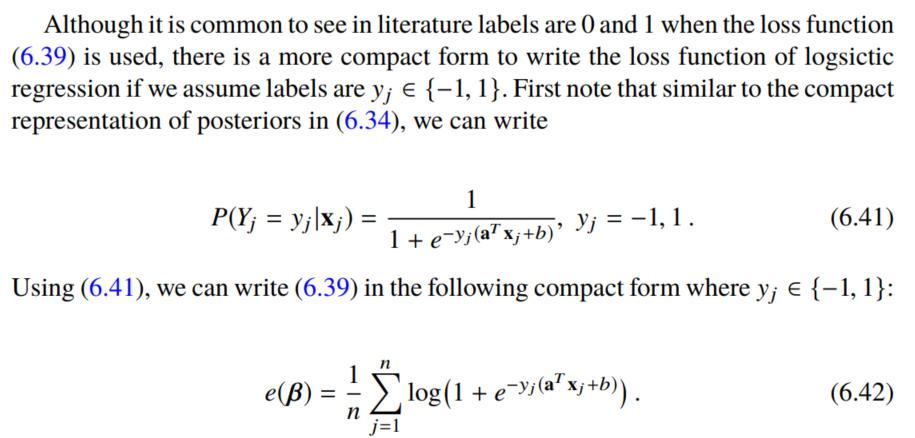

##### Regularization

To use a loss function that constraints the magnitude of coefficients in $a$
- $l_2$ regularization / ridge penalty, $l_1$ regularization / lasso penalty, elastic-net regularization
- $l_1$ regularization internally possesses a feature selection mechanism, aka embedded feature selection

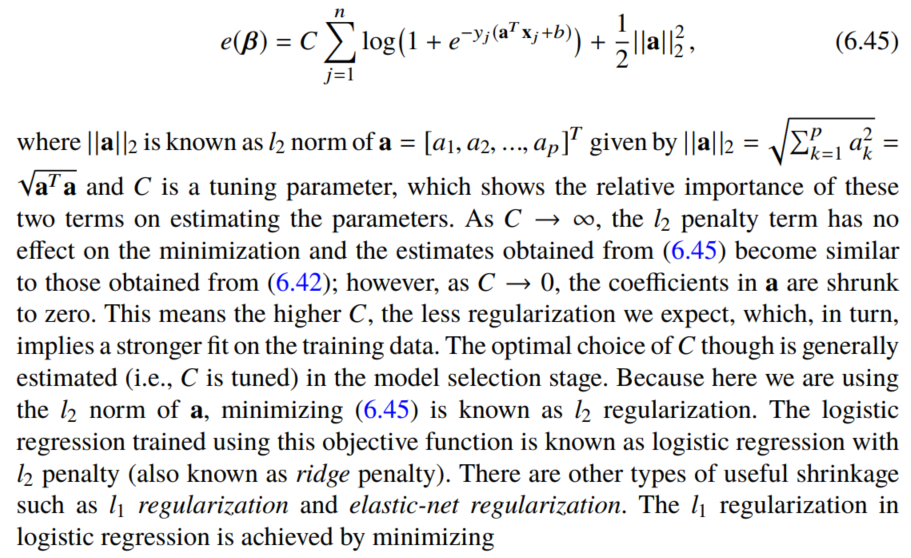
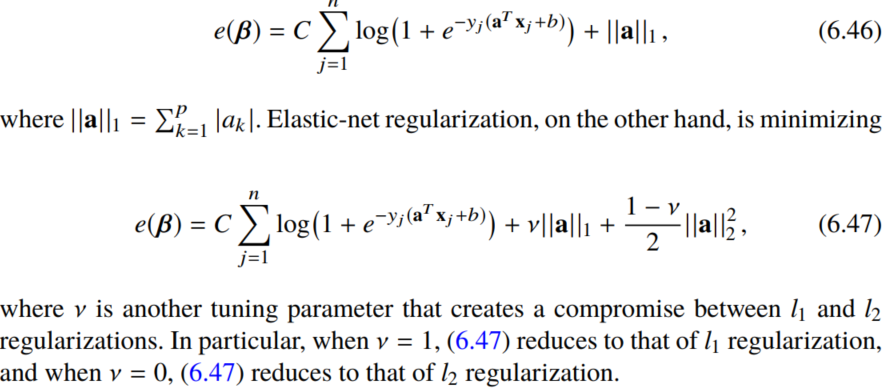
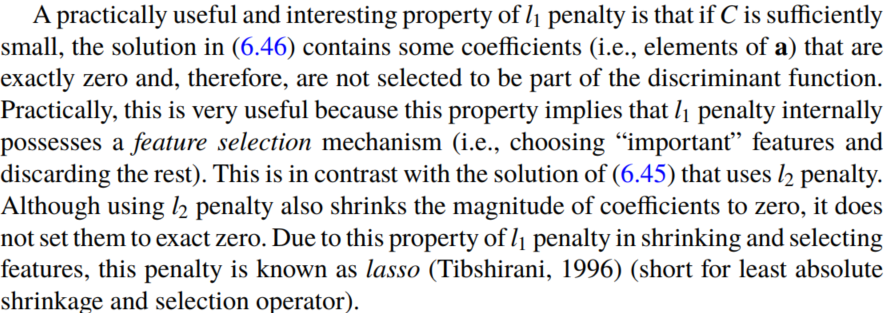

##### Example 1

In [7]:
import numpy as np
arrays = np.load('./data/iris_train_scaled.npz')
X_train = arrays['X']
y_train = arrays['y']
arrays = np.load('./data/iris_test_scaled.npz')
X_test = arrays['X']
y_test = arrays['y']

# we only use sepal width, petal length
X_train = X_train[:, [1,2]]
X_test = X_test[:, [1,2]]

The accuracy for C=0.01 on the training data is 0.817
The accuracy for C=0.01 on the test data is 0.833
The accuracy for C=100 on the training data is 0.950
The accuracy for C=100 on the test data is 0.967


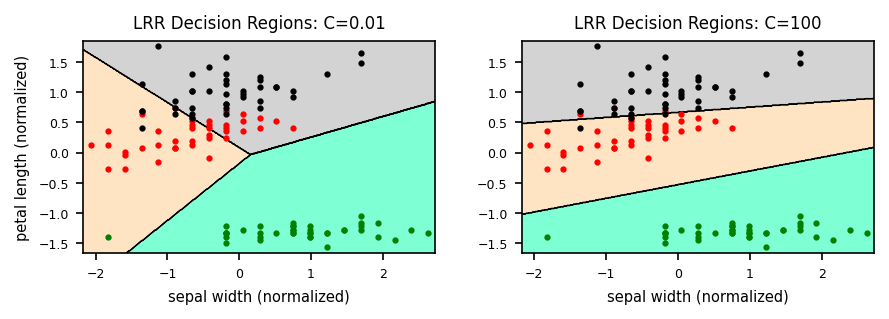

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression as LRR

color = ('aquamarine', 'bisque', 'lightgrey')
cmap = ListedColormap(color)
mins = X_train.min(axis=0) - 0.1
maxs = X_train.max(axis=0) + 0.1
x = np.arange(mins[0], maxs[0], 0.01)
y = np.arange(mins[1], maxs[1], 0.01)
X, Y = np.meshgrid(x, y)
coordinates = np.array([X.ravel(), Y.ravel()]).T
fig, axs = plt.subplots(1, 2, figsize=(6, 2), dpi = 150)
fig.tight_layout()
C_val = [0.01, 100]

for ax, C in zip(axs.ravel(), C_val):
  # l2-regularization by default
  lrr = LRR(C=C)
  lrr.fit(X_train, y_train)
  Z = lrr.predict(coordinates)
  Z = Z.reshape(X.shape)
  ax.tick_params(axis='both', labelsize=6)
  ax.set_title('LRR Decision Regions: C=' + str(C), fontsize=8)
  ax.pcolormesh(X, Y, Z, cmap = cmap, shading='nearest')
  ax.contour(X ,Y, Z, colors='black', linewidths=0.5)
  ax.plot(X_train[y_train==0, 0], X_train[y_train==0, 1],'g.', markersize=4)
  ax.plot(X_train[y_train==1, 0], X_train[y_train==1, 1],'r.', markersize=4)
  ax.plot(X_train[y_train==2, 0], X_train[y_train==2, 1],'k.', markersize=4)
  
  if (C==C_val[0]): 
    ax.set_ylabel('petal length (normalized)',  fontsize=7)
  ax.set_xlabel('sepal width (normalized)', fontsize=7)

  print('The accuracy for C={} on the training data is {:.3f}'.format(C, lrr.score(X_train, y_train)))
  print('The accuracy for C={} on the test data is {:.3f}'.format(C,lrr.score(X_test, y_test)))

A larger value of $C$ points to less regularization and a stronger fit of the LRR model on the training data

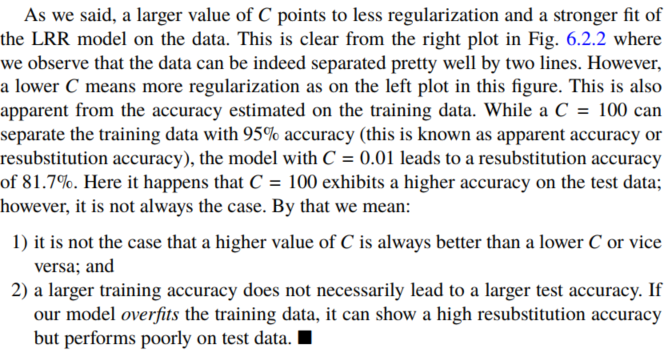

##### Quantifying Odds Ratio and Relative Change on Odds

Let $r_0$ denote the odds of $Y=1$ (versus $Y=0$)

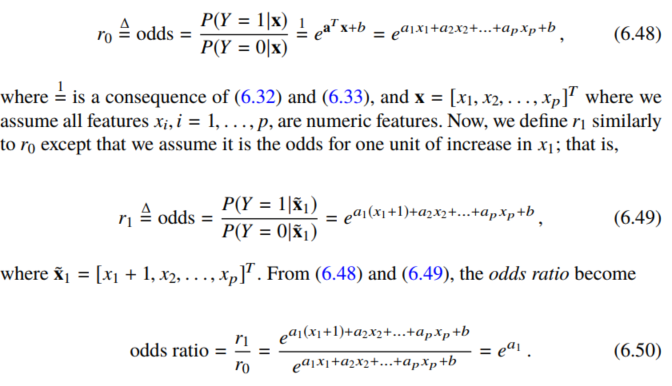

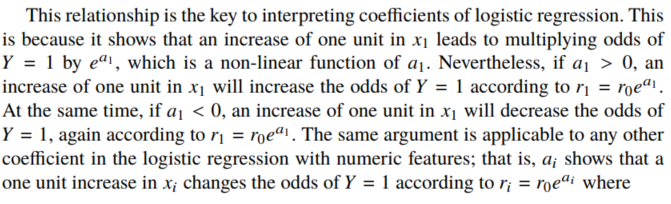

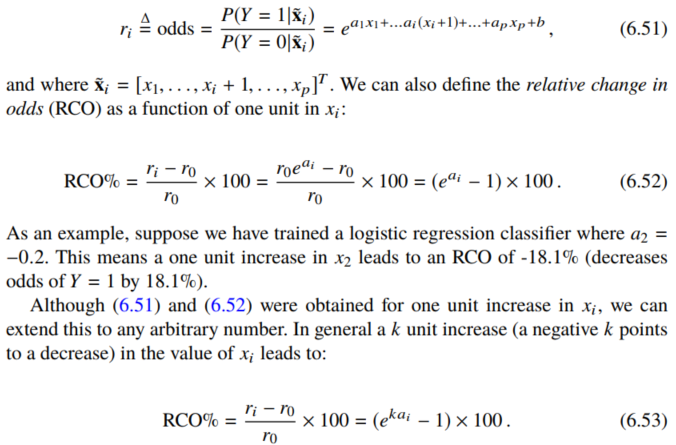

##### Example 2

In [19]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data/GenomicData_OralCancer.txt', delimiter='\t', header=None).T
data = data.drop(data.index[0]).drop(data.columns[0], axis=1)
data.head()

# incorrect dataset

C:\Users\User\AppData\Local\Temp\ipykernel_26216\2616737950.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/GenomicData_OralCancer.txt', delimiter='\t', header=None).T


1     2     3     4     5     6     7     8      9     10     ...  29088  \
1  5.88  3.57  4.44  8.71  5.58  9.75  9.34  5.59  10.27  6.37  ...  10.15   
2  5.99  3.92  4.59  8.31  6.57  9.37  8.75  5.71  10.16  6.44  ...  10.25   
3  6.02   3.9  4.74  8.55  6.22  9.42  8.73  4.68   9.95  6.64  ...   9.95   
4  5.96  4.17  4.62  8.49  6.32  9.06  9.16  4.98  10.07  6.18  ...  10.14   
5  6.29   4.9  4.84  8.54  6.51  9.79  9.76  5.71  10.61  6.06  ...  10.13   

  29089 29090 29091 29092 29093 29094 29095 29096 29097  
1  9.74  6.93  6.87   6.4  6.09  6.12  8.29   7.6   NaN  
2  9.93  6.92  6.84  6.26  6.26   6.4  8.08  6.24   NaN  
3  8.21  7.08  6.98  6.47  6.53  6.27  8.24  7.43   NaN  
4  8.63  6.87   6.8  6.26  6.83  6.32  8.71  7.58   NaN  
5  9.24   6.9  6.82  6.52  6.85  5.98  8.64   7.1   NaN  

[5 rows x 29097 columns]

### 6.3 Linear Models for Regression

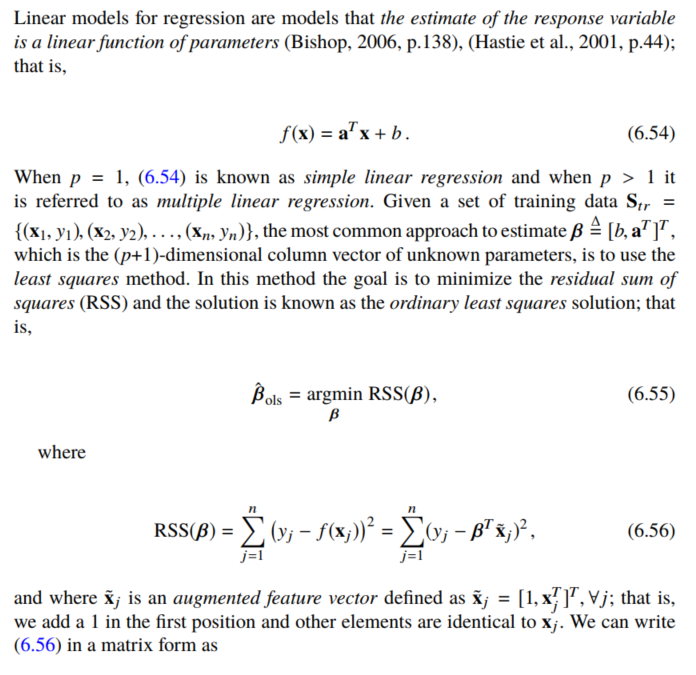
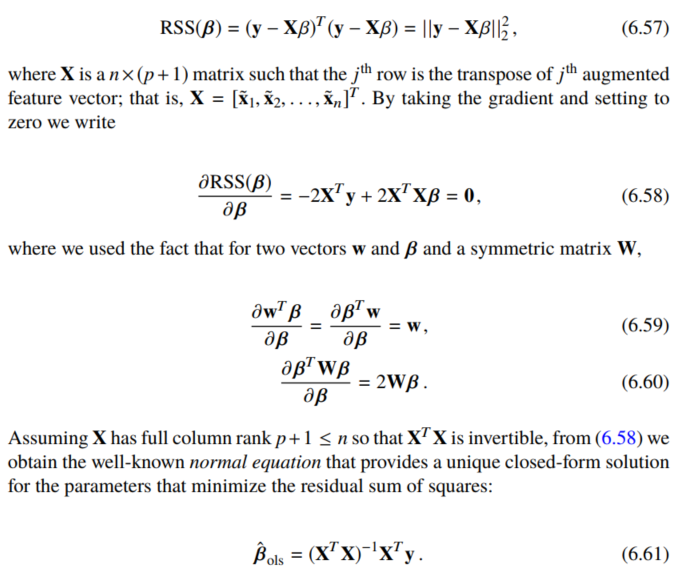
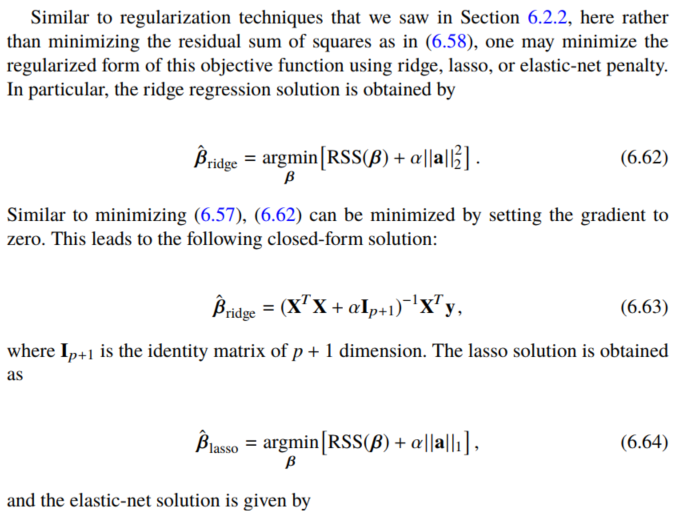
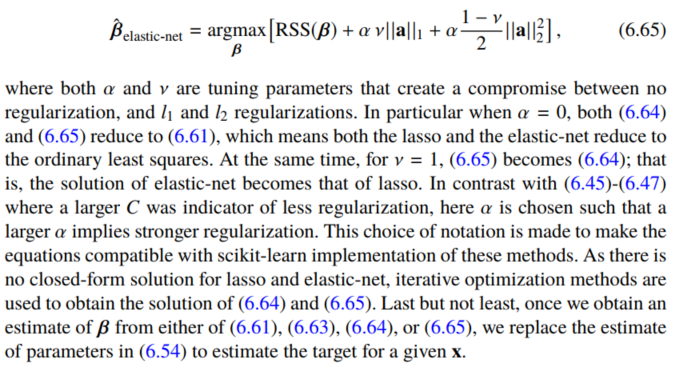